## If you find this kernel helpful, Please UPVOTES.

## Problem Definition
* Guessing the mushroom is not poisonous OR poisonous
### Poisonous = 1
### Eatable = 0

### We use 2 Classification Methods for our prediction:

* DECISION TREE

* RANDOM FORESTS

### Data contains;
* Attribute Information: (classes: edible=e, poisonous=p)

* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

* bruises: bruises=t,no=f

* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

* gill-attachment: attached=a,descending=d,free=f,notched=n

* gill-spacing: close=c,crowded=w,distant=d

* gill-size: broad=b,narrow=n

* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

* stalk-shape: enlarging=e,tapering=t

* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* veil-type: partial=p,universal=u

* veil-color: brown=n,orange=o,white=w,yellow=y

* ring-number: none=n,one=o,two=t

* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
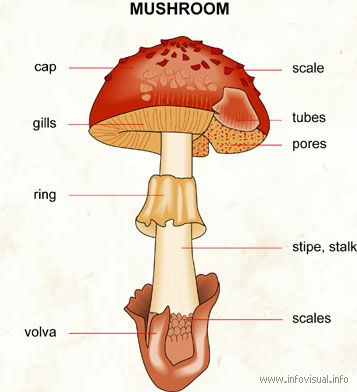
* Cap: The cap is the top of the mushroom (and often looks sort of like a small umbrella). Mushroom caps can come in a variety of colors but most often are brown, white, or yellow.

* Gills, Pores, or Teeth: These structures appear under the mushroom's cap. They look similar to a fish's gills.

* Ring: The ring (sometimes called the annulus) is the remaining structure of the partial veil after the gills have pushed through.

* Stem or Stipe: The stem is the tall structure that holds the cap high above the ground.

* Volva: The volva is the protective veil that remains after the mushroom sprouted up from the ground. As the fungus grows, it breaks through the volva.

* Spores: Microscopic seeds acting as reproductive agents; they are usually released into the air and fall on a substrate to produce a new mushroom.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## READING DATA AND EDA

In [ ]:
data=pd.read_csv("/kaggle/input/mushroom-classification/mushrooms.csv")
df=data.copy()
display(df.tail())
display(df.head())
display(df.columns)

In [ ]:
df.info() 

* We have 23 categorical variables and we have 8124 observation.

In [ ]:
df.isnull().sum()

* We do not have any NaN values.

In [ ]:
for var in df.columns:
    print(df[var].unique())

* Thus we have two claasification. Either the mushroom is poisonous or edible

In [ ]:
df.shape

In [ ]:
df.describe()  #we can see only count,unique,top and freq,because the variables are categories variables..

### Determining the dependent variable and independent variables

In [ ]:
x=df.drop('class',axis=1) 
y=df['class'] 
x.head()

## Encoding categorical data
#### Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
Encoder_x = LabelEncoder() 
for col in x.columns:
    x[col] = Encoder_x.fit_transform(x[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [ ]:
x.head()

* W have categorical variables ,thus we must transform the variables

In [ ]:
y 

In [ ]:
x=pd.get_dummies(x,columns=x.columns,drop_first=True)
x.head()

## SOME OF VISUALIZATION OF DATA

### 1 ) COUNTS OF VARIABLES
* We can see count of all categories.. 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()

In [ ]:
for k,var in enumerate(df.columns):
    plt.figure(k)
    plt.title(var, color = 'red',fontsize=15)
    sns.countplot(x=var, data=df ,order=df[var].value_counts().index)

# PRDEDICTION

## DECISION TREE METHOD

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

### A ) Train -test splitting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

### B ) Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### C ) Modeling of decision tree

In [ ]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(x_train, y_train)

In [ ]:
cart_model

### D ) Accuracy Score and Confusion matrix

In [ ]:
y_pred = cart_model.predict(x_test)
accuracy_score(y_test, y_pred)

In [ ]:
confusion_matrix(y_test,y_pred)

### E ) Model Tuning

In [ ]:
?cart_model

In [ ]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [ ]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(x_train, y_train)

In [ ]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

In [ ]:
cart = tree.DecisionTreeClassifier(max_depth = 8, min_samples_split = 2)
cart_tuned = cart.fit(x_train, y_train)

In [ ]:
y_pred = cart_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

## The importance levels of different categories

In [ ]:
Importance = pd.DataFrame({"Importance": cart_tuned.feature_importances_*100}, index = x_train.columns)

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = False)[:10]

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = False)[:10].plot(kind ="barh", color = "r")

plt.xlabel("Importance Levels of Categories");

In [ ]:
y = df["class"]
x = x[['odor_5', 'stalk-root_2', 'stalk-surface-below-ring_3', 'spore-print-color_5', 'spore-print-color_6']]
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30, 
                                                    random_state=4)

In [ ]:
cart1 = DecisionTreeClassifier()
cart_model1 = cart.fit(x_train, y_train)
cart_model1

In [ ]:
y_pred = cart_model1.predict(x_test)
accuracy_score(y_test, y_pred)

### Model Tuning of 5 important variables

In [ ]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [ ]:
cart1 = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart1, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(x_train, y_train)

In [ ]:
print("Best Parameters: " + str(cart_cv_model.best_params_))

In [ ]:
cart1 = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 2)
cart_tuned1 = cart1.fit(x_train, y_train)

In [ ]:
y_pred = cart_tuned1.predict(x_test)
accuracy_score(y_test, y_pred)

In [ ]:
dot_data = export_graphviz(cart, out_file=None, 
                         feature_names=x.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## RONDOM FORESTS

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### A ) Test-Train splitting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

### B ) Modeling of Random Forests

In [ ]:
rf_model = RandomForestClassifier().fit(x_train, y_train)

### C ) Accuracy and Confusion matrix

In [ ]:
y_pred = rf_model.predict(x_test)
accuracy_score(y_test, y_pred)

### D ) Model Tuning

In [ ]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [ ]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [ ]:
rf_cv_model.fit(x_train, y_train)

In [ ]:
print("Best Parameters: " + str(rf_cv_model.best_params_))

In [ ]:
rf_tuned = RandomForestClassifier(max_depth = 5, 
                                  max_features = 2, 
                                  min_samples_split = 2,
                                  n_estimators = 10)

rf_tuned.fit(x_train, y_train)

In [ ]:
y_pred = rf_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

## The importance levels of different categories for random forests

In [ ]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = x_train.columns)

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = False)[0:10]

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = False)[0:10].plot(kind ="barh", color = "r")

plt.xlabel("Importance Levels of Variables")

In [ ]:
y = df["class"]
x = x[['odor_5', 'stalk-root_2', 'stalk-surface-below-ring_3', 'spore-print-color_5', 'spore-print-color_6']]
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
rf_model1 = RandomForestClassifier().fit(x_train, y_train)

In [ ]:
y_pred = rf_model1.predict(x_test)
accuracy_score(y_test, y_pred)

### Model Tuning of 5 important variables

In [ ]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [ ]:
rf_model1 = RandomForestClassifier()

rf_cv_model1 = GridSearchCV(rf_model1, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2)

In [ ]:
rf_cv_model1.fit(x_train, y_train)

In [ ]:
print("Best Parameters: " + str(rf_cv_model1.best_params_))

In [ ]:
rf_tuned1 = RandomForestClassifier(max_depth = 5, 
                                  max_features = 2, 
                                  min_samples_split = 2,
                                  n_estimators = 10)

rf_tuned1.fit(x_train, y_train)

In [ ]:
y_pred = rf_tuned1.predict(x_test)
accuracy_score(y_test, y_pred)

### THE END 